In [1]:
log="""Total mostly padded agents pruned: 1823
Total invalid positions pruned (either current or next position was all zeros): 42644
Total samples pruned due to too many zeros in the window: 25657
Total valid samples used for training: 89642

Training on 89642 valid timestep sequences.
Input shape: (89642, 50, 6), Output shape: (89642, 2)
Delta stats: mean=[-0.03356359  0.00901839], std=[0.40752494 0.36668205]
Delta range: min=[-2.58819812 -2.36310903], max=[2.20554721 2.08393287]
🔧 GradientMonitoringCallback initialized with clip_min=0.0001, clip_max=100.0, monitor_freq=3

--- Phase 1: Training ---
Epoch 1/30
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m0s[0m 21ms/step - loss: 0.1783 - mae: 0.2246
New best val_loss: 0.081525. Saving model...
Model and normalization parameters saved to lstm_single_step.pkl
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m55s[0m 22ms/step - loss: 0.1783 - mae: 0.2246 - val_loss: 0.0815 - val_mae: 0.2149
Epoch 2/30
[1m2389/2391[0m [32m━━━━━━━━━━━━━━━━━━━[0m[37m━[0m [1m0s[0m 21ms/step - loss: 0.2135 - mae: 0.2626
New best val_loss: 0.055050. Saving model...
Model and normalization parameters saved to lstm_single_step.pkl
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m52s[0m 22ms/step - loss: 0.2135 - mae: 0.2626 - val_loss: 0.0551 - val_mae: 0.1543
Epoch 3/30
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m52s[0m 22ms/step - loss: 0.1464 - mae: 0.2049 - val_loss: 0.0886 - val_mae: 0.1955
Epoch 4/30
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m50s[0m 21ms/step - loss: 0.1581 - mae: 0.2194 - val_loss: 0.3839 - val_mae: 0.4910
Epoch 5/30
[1m2390/2391[0m [32m━━━━━━━━━━━━━━━━━━━[0m[37m━[0m [1m0s[0m 14ms/step - loss: 0.1771 - mae: 0.2460
Epoch 5: val_loss did not improve. Reducing LR from 0.001000 to 0.000500
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m37s[0m 16ms/step - loss: 0.1771 - mae: 0.2460 - val_loss: 0.1735 - val_mae: 0.3191
Epoch 6/30
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m36s[0m 15ms/step - loss: 0.1744 - mae: 0.2446 - val_loss: 0.0895 - val_mae: 0.2059

--- Phase 2: Fine-tuning ---
Epoch 1/15
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m0s[0m 14ms/step - loss: 0.1358 - mae: 0.1699
New best val_loss: 0.050272. Saving model...
Model and normalization parameters saved to lstm_single_step.pkl
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m37s[0m 15ms/step - loss: 0.1358 - mae: 0.1699 - val_loss: 0.0503 - val_mae: 0.1282 - learning_rate: 1.0000e-05
Epoch 2/15
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m35s[0m 15ms/step - loss: 0.1382 - mae: 0.1683 - val_loss: 0.0509 - val_mae: 0.1313 - learning_rate: 1.0000e-05
Epoch 3/15
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m35s[0m 15ms/step - loss: 0.1287 - mae: 0.1667 - val_loss: 0.0509 - val_mae: 0.1308 - learning_rate: 1.0000e-05
Epoch 4/15
[1m2391/2391[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m35s[0m 15ms/step - loss: 0.1395 - mae: 0.1700 - val_loss: 0.0514 - val_mae: 0.1318 - learning_rate: 1.0000e-05
"""

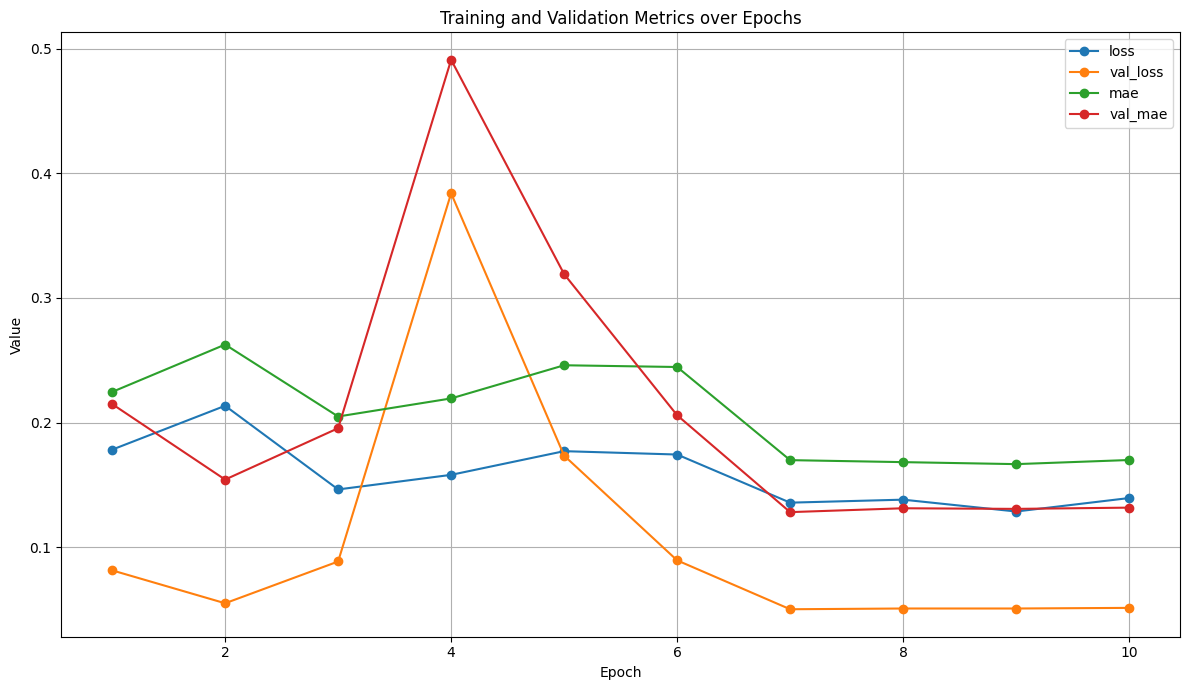

In [5]:
import re
import matplotlib.pyplot as plt

# Pattern to extract each metric (floats, including scientific notation)
pattern = r"(-?\d+(?:\.\d+)?(?:e[-+]?\d+)?)"

loss_values = []
val_loss_values = []
mae_values = []
val_mae_values = []

# Split log by lines and parse line by line
for line in log.splitlines():
    loss_match = re.search(rf"loss: {pattern}", line)
    val_loss_match = re.search(rf"val_loss: {pattern}", line)
    mae_match = re.search(rf"mae: {pattern}", line)
    val_mae_match = re.search(rf"val_mae: {pattern}", line)

    # Only append if all metrics found in the line
    if loss_match and val_loss_match and mae_match and val_mae_match:
        loss_values.append(float(loss_match.group(1)))
        val_loss_values.append(float(val_loss_match.group(1)))
        mae_values.append(float(mae_match.group(1)))
        val_mae_values.append(float(val_mae_match.group(1)))

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 7))
plt.plot(epochs, loss_values, marker='o', label='loss')
plt.plot(epochs, val_loss_values, marker='o', label='val_loss')
plt.plot(epochs, mae_values, marker='o', label='mae')
plt.plot(epochs, val_mae_values, marker='o', label='val_mae')

plt.title('Training and Validation Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
